In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Car Price Regression

The following Project will try to predict car prices based on the selected features. To do so, we will try different models to find the most efficient one to complete our task.

In [3]:
df=pd.read_csv('/content/Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
(df.isnull().sum()/len(df))*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [7]:
# here we can see how the data is distributed and how it behaves
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Next, we need to fix the Null/NaN values.

## Mileage

Mileage is currently an object data type and not a numeric data type. Let's remove the string value and turn it into a numeric value.

First, we check if mileage is related or has a pattern with the other features.

### Mileage - Year

In [8]:
# year_mileage
mil_year=df[df['mileage'].notnull()]
mil_year['mileage']=mil_year['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
mil_year['mileage']=mil_year['mileage'].astype('float')
pd.DataFrame(mil_year.groupby('year')['mileage'].agg([np.mean, np.std]))

<ipython-input-8-6fb6421bce00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_year['mileage']=mil_year['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
<ipython-input-8-6fb6421bce00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_year['mileage']=mil_year['mileage'].astype('float')


,mean,std
year,,
1994,14.450000,2.333452
1995,16.100000,NaN
1996,16.100000,0.000000
1997,16.066667,0.628490
1998,15.933333,1.478175
1999,15.964286,0.773212
2000,16.368750,2.670261
2001,16.700000,1.003992
2002,16.327895,2.459717


### Mileage - Fuel

In [9]:
# fuel_mileage
mil_fuel=df[df['mileage'].notnull()]
mil_fuel['mileage']=mil_fuel['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
mil_fuel['mileage']=mil_fuel['mileage'].astype('float')
pd.DataFrame(mil_fuel.groupby('fuel')['mileage'].agg([np.mean, np.std]))

<ipython-input-9-1cedd95f5dc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_fuel['mileage']=mil_fuel['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
<ipython-input-9-1cedd95f5dc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_fuel['mileage']=mil_fuel['mileage'].astype('float')


,mean,std
fuel,,
CNG,24.165660,5.422322
Diesel,19.642624,4.624294
LPG,18.577143,5.153202
Petrol,19.082301,3.047539


### Mileage - Seller Type

In [10]:
# seller_type_mileage
mil_type=df[df['mileage'].notnull()]
mil_type['mileage']=mil_type['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
mil_type['mileage']=mil_type['mileage'].astype('float')
pd.DataFrame(mil_type.groupby('seller_type')['mileage'].agg([np.mean, np.std]))

<ipython-input-10-b18008acac47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_type['mileage']=mil_type['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
<ipython-input-10-b18008acac47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_type['mileage']=mil_type['mileage'].astype('float')


,mean,std
seller_type,,
Dealer,19.469268,4.363657
Individual,19.440216,4.010930
Trustmark Dealer,18.585847,2.949323


### Mileage - Transmission

In [11]:
# transmission_mileage
mil_trans=df[df['mileage'].notnull()]
mil_trans['mileage']=mil_trans['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
mil_trans['mileage']=mil_trans['mileage'].astype('float')
pd.DataFrame(mil_trans.groupby('transmission')['mileage'].agg([np.mean, np.std]))

<ipython-input-11-f87a90240ed5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_trans['mileage']=mil_trans['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
<ipython-input-11-f87a90240ed5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_trans['mileage']=mil_trans['mileage'].astype('float')


,mean,std
transmission,,
Automatic,17.564765,3.985464
Manual,19.699883,3.970322


### Mileage - Owner

In [12]:
# owner_mileage
mil_owner=df[df['mileage'].notnull()]
mil_owner['mileage']=mil_owner['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
mil_owner['mileage']=mil_owner['mileage'].astype('float')
pd.DataFrame(mil_owner.groupby('owner')['mileage'].agg([np.mean, np.std]))

<ipython-input-12-c98ae0ee2f22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_owner['mileage']=mil_owner['mileage'].astype('string').apply(lambda x: x.split(' ')[0])
<ipython-input-12-c98ae0ee2f22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_owner['mileage']=mil_owner['mileage'].astype('float')


,mean,std
owner,,
First Owner,19.902403,3.994071
Fourth & Above Owner,17.394625,3.715177
Second Owner,18.713624,4.006570
Test Drive Car,16.910000,3.044060
Third Owner,17.922000,3.717258


After evaluating the different options, we will replace the NaN values for mileage based on the yearly average for mileage.

In [13]:
# size of the yearly average data frame
len(mil_year)

7907

In [14]:
# size of overall data frame
len(df)

8128

In [15]:
# adding the yearly mileage average to the overall data frame
df['mileage']=mil_year['mileage']

In [16]:
# here we use the .transform() function in combination with .fillna()
df['mileage']=df['mileage'].fillna(df.groupby('year')['mileage'].transform('mean'))

In [17]:
# for the for those years where we were not able to generate an average mileage we just used the overall average
df['mileage']=df['mileage'].fillna(df['mileage'].mean())

In [18]:
(df.isnull().sum()/len(df))*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

## Engine

In [19]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [20]:
df['engine'].unique()

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [21]:
eng=df[df['engine'].notnull()]
eng.groupby('year')['engine'].value_counts().sort_values(ascending=False)

year  engine 
2017  1248 CC    154
2018  1197 CC    149
2019  1197 CC    132
2013  1248 CC    130
2016  1248 CC    121
                ... 
2012  2143 CC      1
      1991 CC      1
      1948 CC      1
      1797 CC      1
2020  2993 CC      1
Name: engine, Length: 767, dtype: int64

In [22]:
df[df['engine'].isnull()]['year'].value_counts()

2012    30
2006    22
2011    22
2005    21
2010    19
2009    15
2008    13
2003    12
2004    11
2007    10
2002     8
2017     8
2000     6
1999     4
2001     4
2016     3
1997     2
2013     2
1994     1
1995     1
1996     1
1983     1
1998     1
1991     1
2015     1
2018     1
2014     1
Name: year, dtype: int64

In [23]:
df[df['engine'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,16.614277,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,15.778378,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,15.778378,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,20.136452,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,17.504453,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,16.368750,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,16.368750,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,16.174020,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,20.864713,NaN,NaN,NaN,NaN


In [24]:
# based on fuel type
eng.groupby('fuel')['engine'].value_counts().sort_values(ascending=False)

fuel    engine 
Diesel  1248 CC    1017
Petrol  1197 CC     832
        796 CC      432
        998 CC      424
Diesel  2179 CC     389
                   ... 
CNG     1586 CC       1
        1373 CC       1
        1193 CC       1
        1086 CC       1
Petrol  3498 CC       1
Name: engine, Length: 153, dtype: int64

In [25]:
df[df['engine'].isnull()]['fuel'].value_counts()

Petrol    111
Diesel    103
CNG         4
LPG         3
Name: fuel, dtype: int64

Because we have more cars which run on petrol as on diesel, we will replace all NaN values with "1197 CC".

In [26]:
df['engine']=df['engine'].fillna('1197 CC')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 825.6+ KB


## Max Power

In [28]:
# we have a total of 215 rows, where Max Power has NaN values
df[df['max_power'].isnull()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,16.614277,1197 CC,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,15.778378,1197 CC,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,15.778378,1197 CC,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,20.136452,1197 CC,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,17.504453,1197 CC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,16.368750,1197 CC,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,16.368750,1197 CC,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,16.174020,1197 CC,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,20.864713,1197 CC,NaN,NaN,NaN


In [29]:
max_power=df[df['max_power'].notnull()]
max_power['max_power']=max_power['max_power'].astype('string').apply(lambda x: x.split(' ')[0])
max_power['max_power']=pd.to_numeric(max_power['max_power'], errors='coerce')
max_power

<ipython-input-29-73dab3a10028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_power['max_power']=max_power['max_power'].astype('string').apply(lambda x: x.split(' ')[0])
<ipython-input-29-73dab3a10028>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_power['max_power']=pd.to_numeric(max_power['max_power'], errors='coerce')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70.00,140Nm@ 1800-3000rpm,5.0


In [30]:
df['max_power']=max_power['max_power']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [31]:
# we make here the decision to use the average max power based on the engine column
# for replacing the NaN values
df['max_power']=df['max_power'].fillna(df.groupby('engine')['max_power'].transform('mean'))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 825.6+ KB


## Torque

Due to my missing knowledge/understanding for/of this feature, I have decided to drop the column.

In [33]:
df=df.drop(['torque'], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [35]:
(df.isnull().sum()/len(df))*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.000000
engine           0.000000
max_power        0.000000
seats            2.718996
dtype: float64

## Seats

In [36]:
round(df['seats'].mean())

5

In [37]:
# the overall mean is 5, and we do not have a time efficient way to find for each car the right amount of car seats
df['seats']=df['seats'].fillna(round(df['seats'].mean()))
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,5.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


# Name

The name itself might not really be helpful, but we get the car brands, by splitting "name" and take the first value.

In [39]:
df['brand']=df['name'].apply(lambda x: x.split(' ')[0])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,5.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,5.0,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,5.0,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,5.0,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,5.0,Maruti


In [40]:
# we have 32 unique brands
df['brand'].nunique()

32

In [41]:
# we rearrange the order of the columns, which is not necessary, but I like it better that way
df=df[['brand', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
      'mileage', 'engine', 'max_power', 'seats', 'selling_price']]
df.head()

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
0,Maruti,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74.00,5.0,450000
1,Skoda,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52,5.0,370000
2,Honda,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78.00,5.0,158000
3,Hyundai,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90.00,5.0,225000
4,Maruti,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.20,5.0,130000


In [42]:
(df.isnull().sum()/len(df))*100

brand            0.0
year             0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          0.0
engine           0.0
max_power        0.0
seats            0.0
selling_price    0.0
dtype: float64

# Exploratory Analysis
## How does the price behave with the different features

<Axes: xlabel='selling_price', ylabel='Density'>

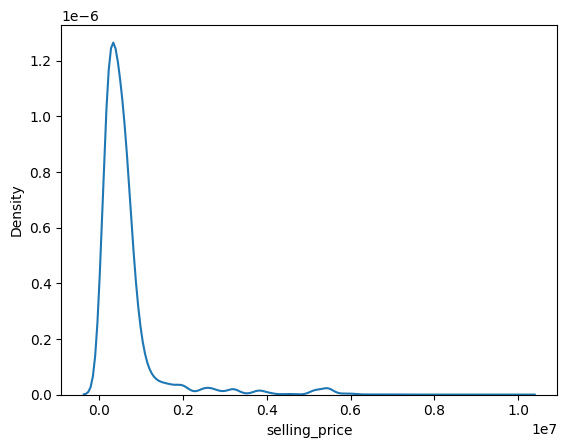

In [43]:
sns.kdeplot(df['selling_price'])

Here we can see that most selling prices are at the lower end, which we can see because the histogram for the selling price is left-skewed.

We need to add that the histogram is heavily left-skewed. Later on, we will see how we dealt with the skewness.

<Axes: xlabel='year', ylabel='selling_price'>

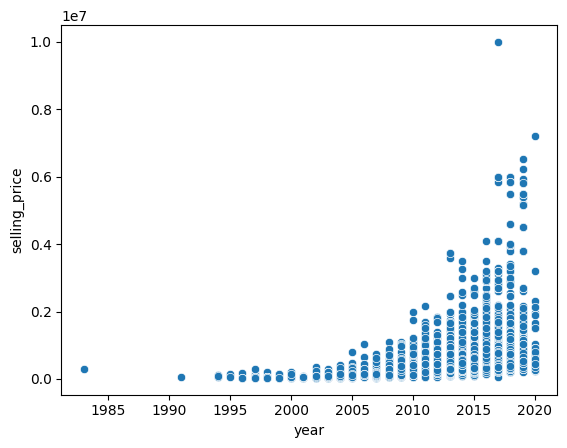

In [44]:
sns.scatterplot(x='year', y='selling_price', data=df)

Here we can see the older the car, the lower the selling price is. This can indicate that this data set does not contain any oldtimers, just regular cars, which do not increase in value over time.

In [45]:
# the data point to the top-right seems odd and a real outlier
# Therefore, we should drop it
df[df['selling_price']==df['selling_price'].max()]

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
170,Volvo,2017,30000,Petrol,Individual,Automatic,First Owner,42.0,1969 CC,400.0,4.0,10000000


The data point to the outer left seems odd and can be considered a real outlier. Therefore, we should drop it.

In [46]:
# here the same=> at the bottom left
df[(df['selling_price']==df['selling_price'].min()) & (df['year']>=1993)]

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
5714,Maruti,1997,80000,Petrol,Individual,Manual,Third Owner,16.1,796 CC,37.0,4.0,29999


In [47]:
df=df.drop([170, 5714], axis=0)

In [48]:
df[df['year']<1993]

,brand,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price
316,Mahindra,1983,10000,Diesel,Individual,Manual,Third Owner,19.360061,1197 CC,81.733747,5.0,300000
5322,Maruti,1991,120000,LPG,Individual,Manual,Second Owner,19.360061,1197 CC,81.733747,5.0,55000


In [49]:
df=df.drop([316, 5322], axis=0)

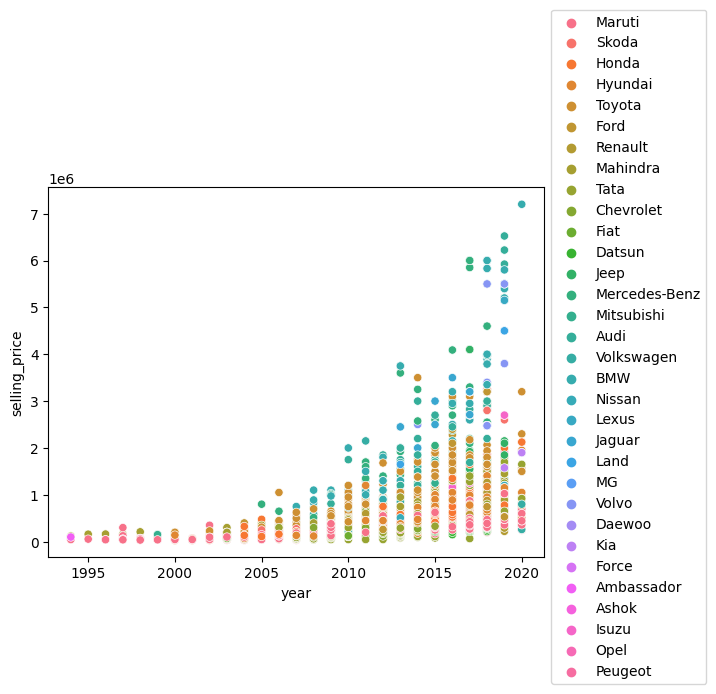

In [50]:
# here we can see that the most expensive cars belong to the brands like Mercedes, BMW, Audi, Jaguar etc.
sns.scatterplot(x='year', y='selling_price', hue='brand', data=df)
plt.legend(bbox_to_anchor=(1,1.5))

Note=> when we look at the top right, we still can see a few data points, which can be considered outliers. I will leave them in because I want to go with a more generalized approach and see how the models will perform with this approach.

Note => In future studies, the outliers at the top right can be dropped to see how they will affect the model(s) performance.

<Axes: xlabel='fuel', ylabel='selling_price'>

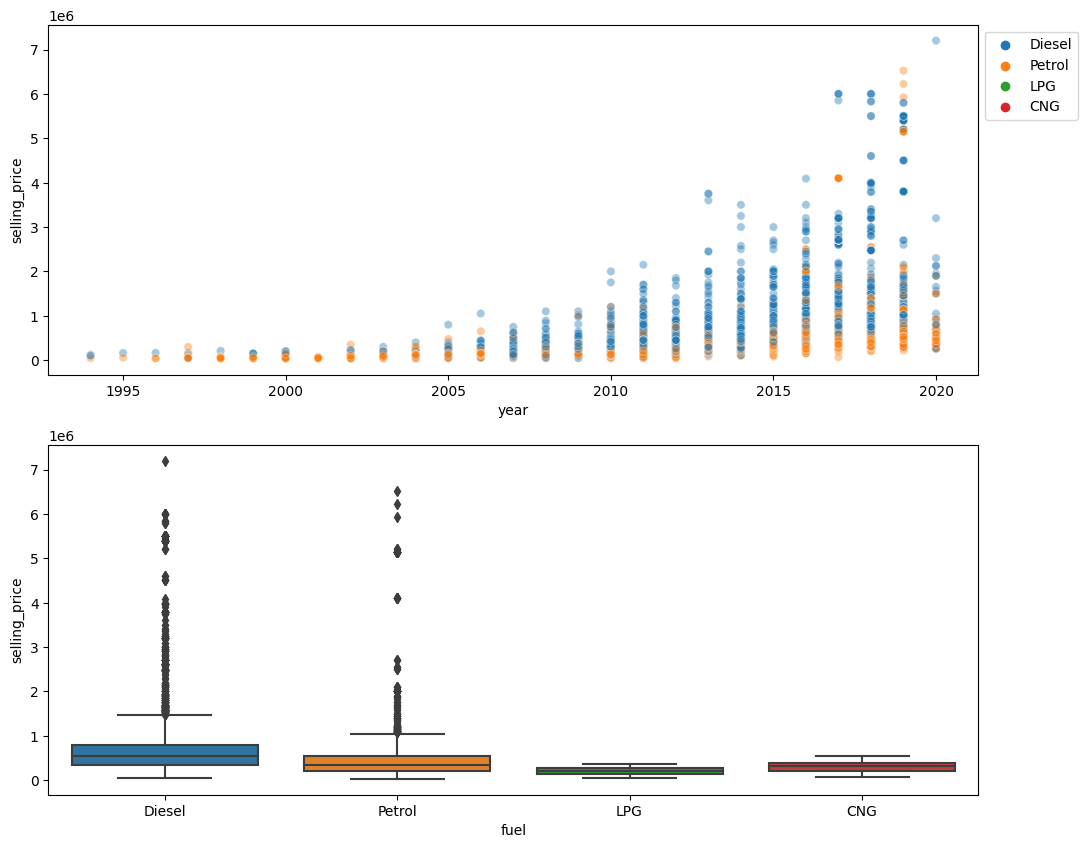

In [51]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.scatterplot(x='year', y='selling_price', alpha=0.4, hue='fuel', data=df)
plt.legend(bbox_to_anchor=(1,1))
plt.subplot(2,1,2)
sns.boxplot(x='fuel', y='selling_price', data=df)

Cars which run on diesel tend to be the most expensive.
The same trend is observable in the box plots. Also, we can see that diesel and petrol have the most outliers.

<Axes: xlabel='transmission', ylabel='selling_price'>

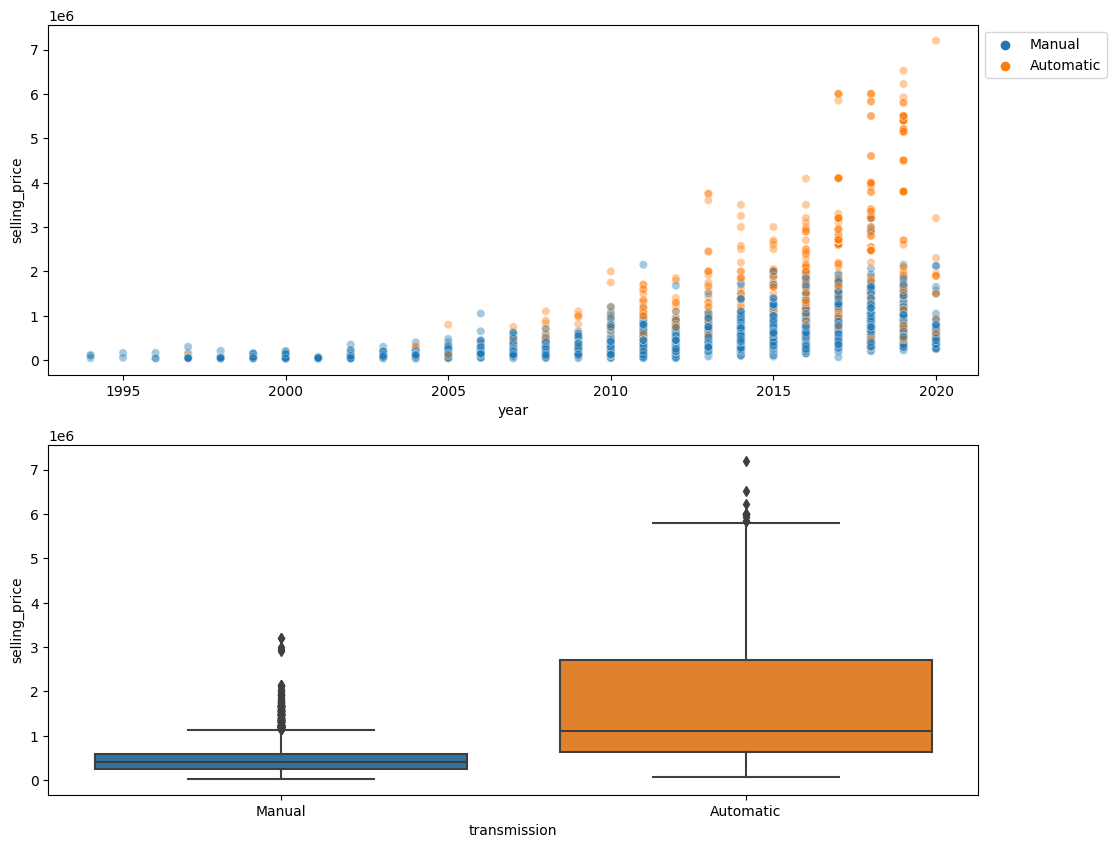

In [52]:
# here, we can see that cars with automatic transmissions are the most expensive ones
# the majority of the cars are from the 2010s
# cars with manual transmission do have the least variance; cars with automatic transmissions have far more variance
# and automatic transmission cars tend to be more expensive than manual cars

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.scatterplot(x='year', y='selling_price', alpha=0.4, hue='transmission', data=df)
plt.legend(bbox_to_anchor=(1,1))

plt.subplot(2,1,2)
sns.boxplot(x='transmission', y='selling_price', data=df)

<Axes: >

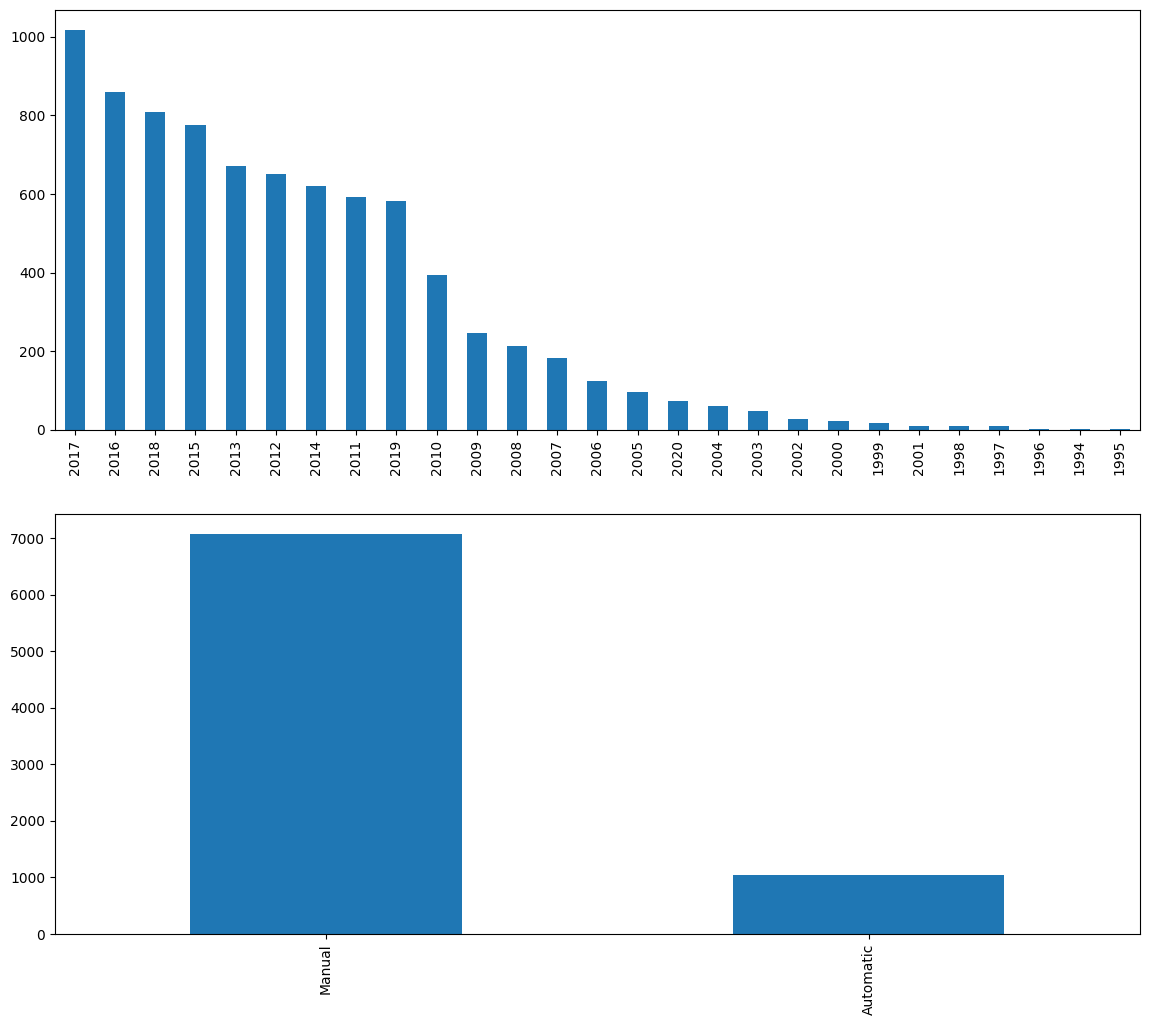

In [53]:
# the majority of the cars are form the 2010s
# the data set contains more automatic than manual cars

plt.figure(figsize=(14,12))
plt.subplot(2,1,1)
df['year'].value_counts().plot(kind='bar')

plt.subplot(2,1,2)
df['transmission'].value_counts().plot(kind='bar')

<Axes: xlabel='selling_price', ylabel='km_driven'>

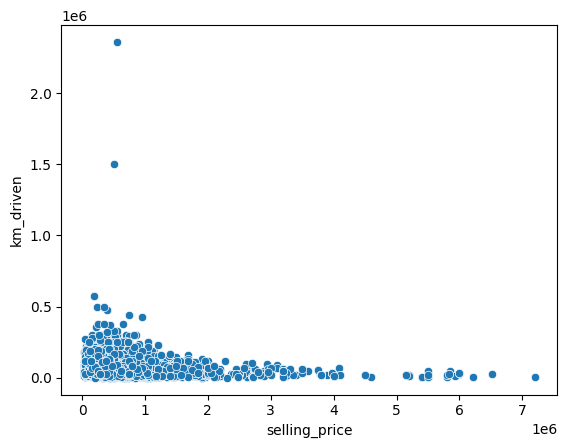

In [54]:
sns.scatterplot(x='selling_price', y='km_driven', data=df)

We have to drop two outliers, but we can see that the fewer kilometres are driven, the higher the selling price will be.

In [55]:
df['km_driven'].sort_values(ascending=False)

3486    2360457
1810    1500000
3508     577414
6673     500000
3641     500000
         ...   
7492       1000
6638       1000
7589       1000
7429       1000
7913          1
Name: km_driven, Length: 8124, dtype: int64

In [56]:
# here we drop the two outliers
df=df.drop([3486, 1810], axis=0)

<Axes: xlabel='selling_price', ylabel='km_driven'>

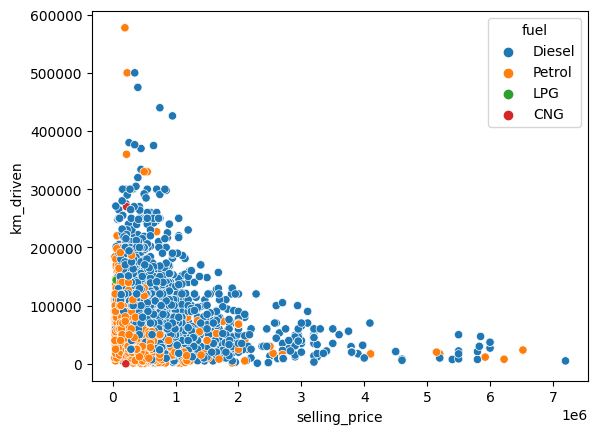

In [57]:
# we cannot observe any drastic behaviour when we add fuel
# again, we can see some "outliers"
# since we will run a generalized model, we will not drop them

sns.scatterplot(x='selling_price', y='km_driven', hue='fuel', data=df)

<Axes: xlabel='selling_price', ylabel='km_driven'>

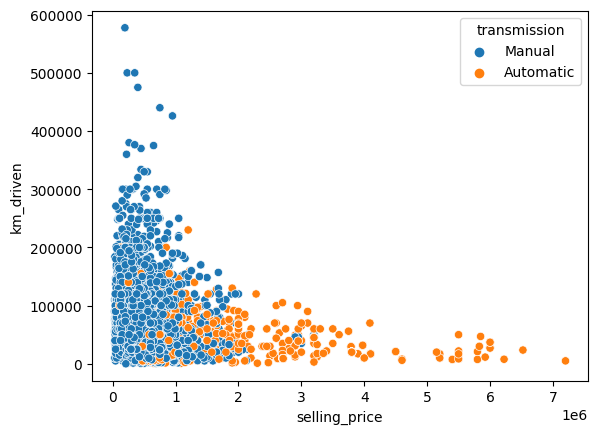

In [58]:
# here we can see that manual cars tend to have more kilometres driven but also are less in value

sns.scatterplot(x='selling_price', y='km_driven', hue='transmission', data=df)

<Axes: xlabel='year', ylabel='selling_price'>

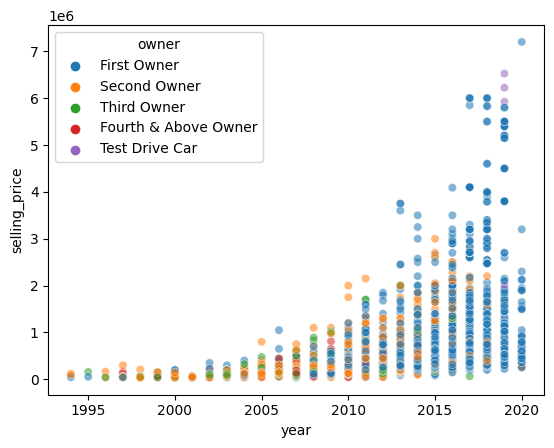

In [59]:
# we can observe a very normal trend
## the latest models have not had more than one owner
## the older the car gets, the more owner the car had

sns.scatterplot(x='year', y='selling_price', alpha=0.55, hue='owner', data=df)

<Axes: xlabel='year', ylabel='selling_price'>

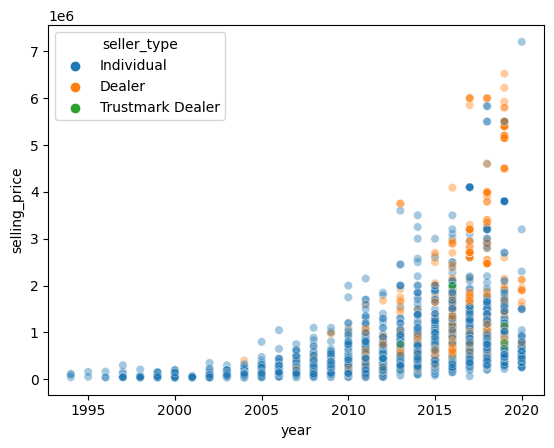

In [60]:
# here we can observe a logical trend; individuals are more likely to sell older cars then new ones
# dealers rather sell the latest versions/cars

sns.scatterplot(x='year', y='selling_price', alpha=0.4, hue='seller_type', data=df)

<Axes: xlabel='max_power', ylabel='selling_price'>

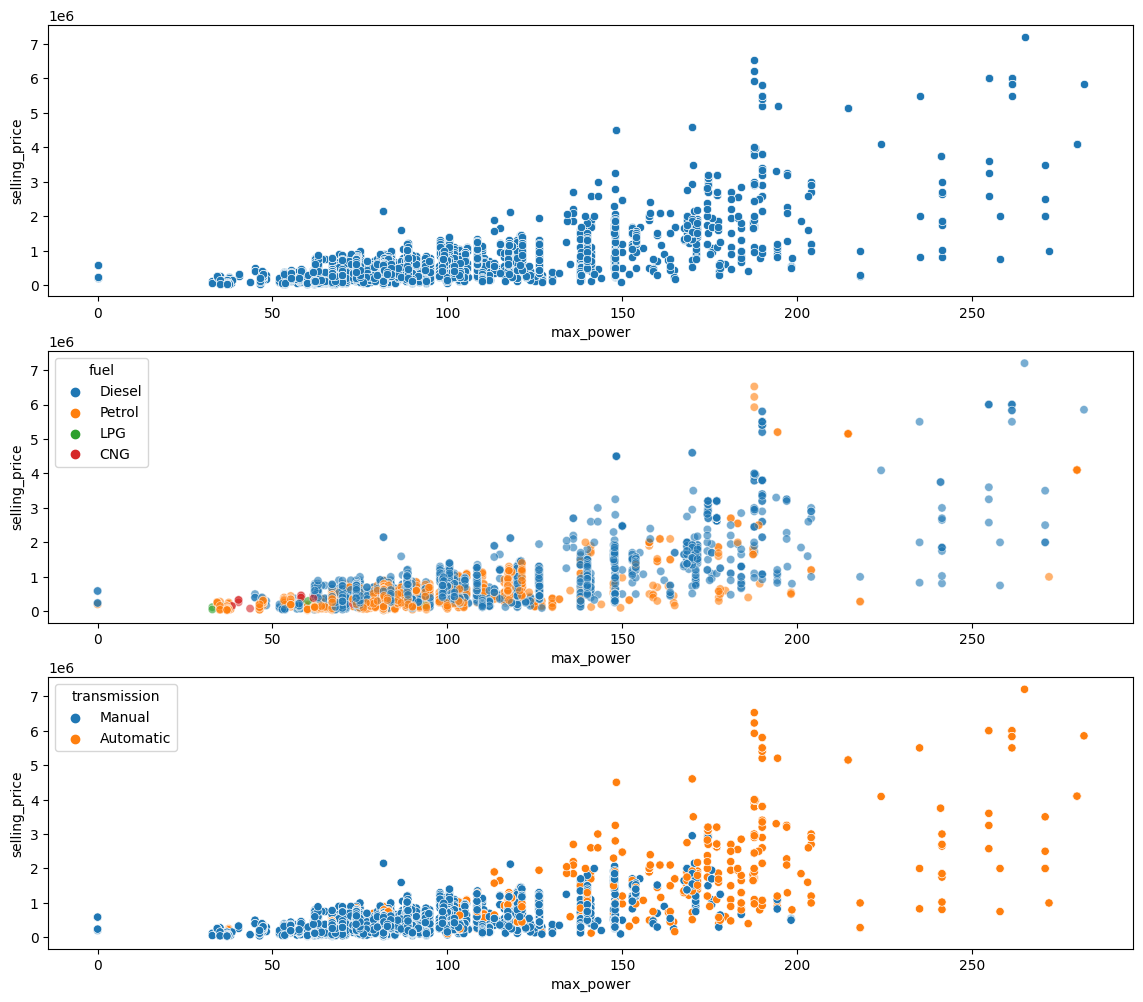

In [61]:
plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
sns.scatterplot(x='max_power', y='selling_price', data=df)

plt.subplot(3,1,2)
sns.scatterplot(x='max_power', y='selling_price', alpha=0.6, hue='fuel' ,data=df)

plt.subplot(3,1,3)
sns.scatterplot(x='max_power', y='selling_price', hue='transmission' ,data=df)

The majority of the cars have a moderate selling price and moderate level of horsepower. LPG and CNG have lower selling prices and low horsepower.

When we look at the transmission, we see that cars with an automatic transmission have the most horsepower and the highest selling price. This can have many reasons. One of them could be that these cars are the most recent ones. Therefore they cost more and have more horsepower.

We created multiple scatterplots to understand the data better, but let us make a pairplot with all these aspects in one graph.

This will help us to make the right decisions regarding the machine learning models.

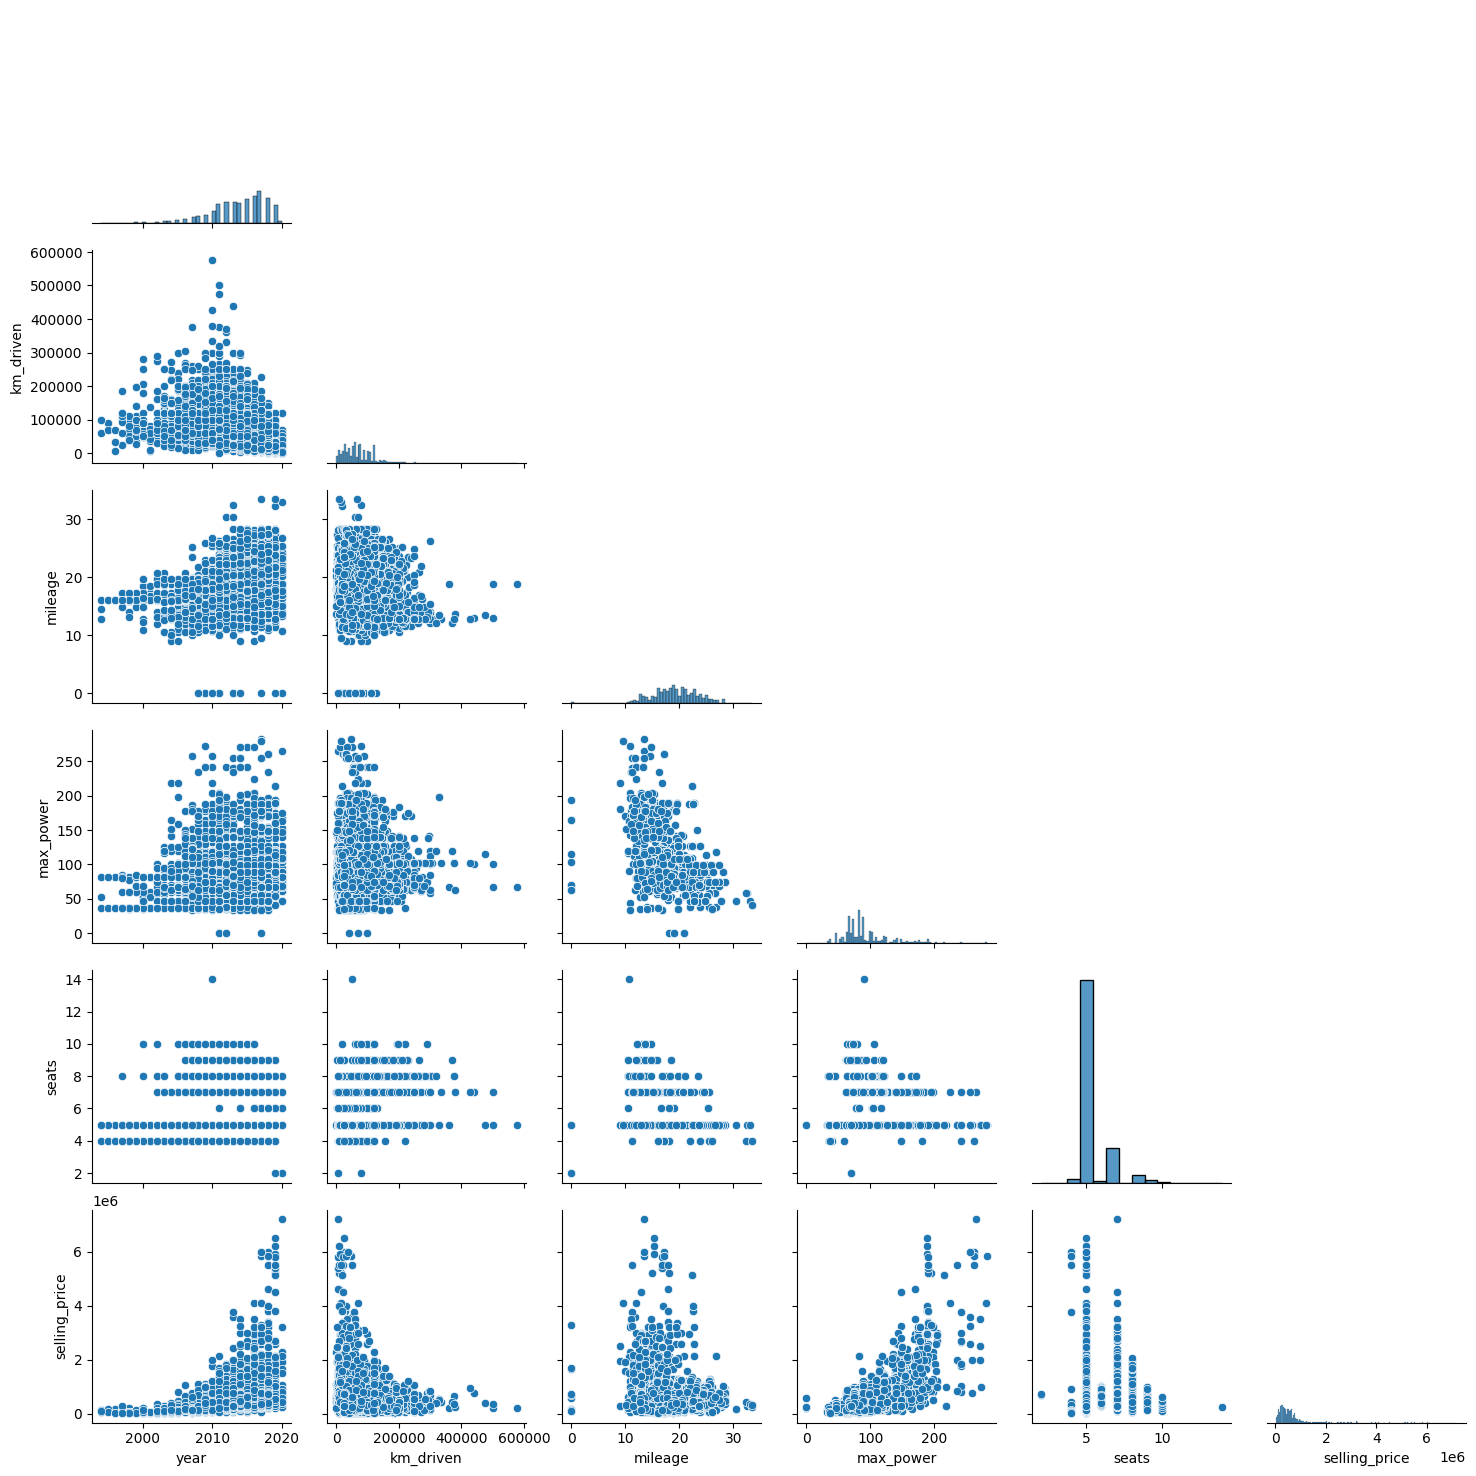

In [62]:
sns.pairplot(df, corner=True)

<ipython-input-63-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

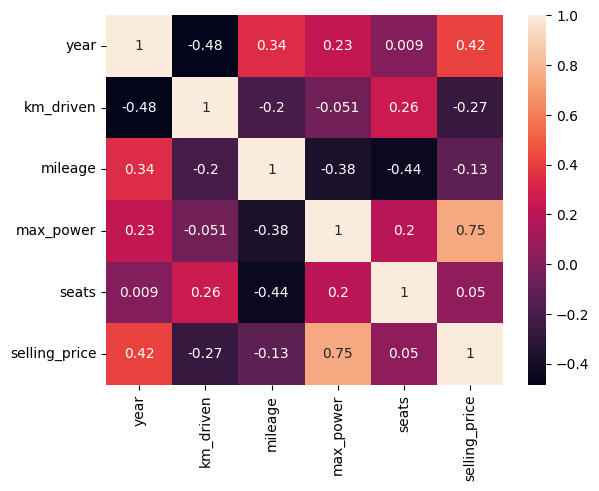

In [63]:
sns.heatmap(df.corr(), annot=True)

Based on the heatmap, we should drop mileage and seats because these columns do not correlate as strongly as the other features.

Let's check for the importance of the features with an ExtraTreeRegressor, to see if we can confirm the findings of the previous two graphs.

In [64]:
X=pd.get_dummies(df.drop(['selling_price'], axis=1), drop_first=True)
y=df['selling_price']

First, we will perform a recursive feature elimination to see how many features are important and, afterwards, an ExtraTreeRegressor, to see which features those are.

<Axes: >

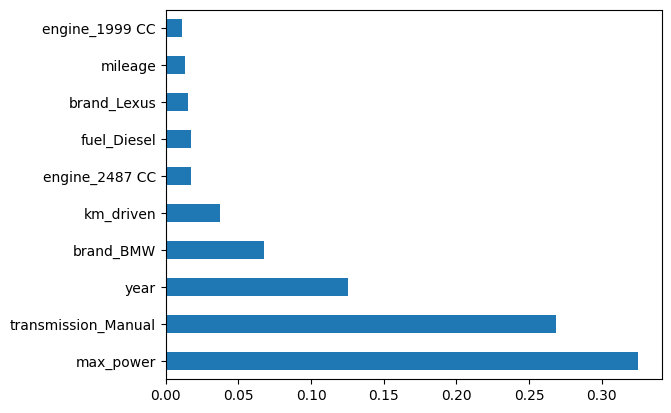

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
import_feat=ExtraTreesRegressor().fit(X,y)
feat_import=pd.Series(import_feat.feature_importances_, index=X.columns)
feat_import.nlargest(10).plot(kind='barh')

Based on the feature important analysis, we will use following features for the project:

- max_power (hp)

- transmission

- year

- km_driven

- fuel

I have decided to not include brands, because this feature would make the model too complex to use.

# Model Selection

After analysing the data we can see different linear trends/relationship, but we do have features which are not linear, therefore we will use:
- Support Vector Regressor

- RandomForest Regressor

- Gradient Boost Regressor=> We do not use Hist Gradient Boosting Regressor, because the data set is smaller than 10.000

- Ada Boosting Regressor

- XG Boosting Regressor

In [66]:
X=pd.get_dummies(df[['max_power', 'transmission', 'year', 'km_driven', 'fuel']], drop_first=True)
y=df['selling_price']

## Choosing a Scaling Method

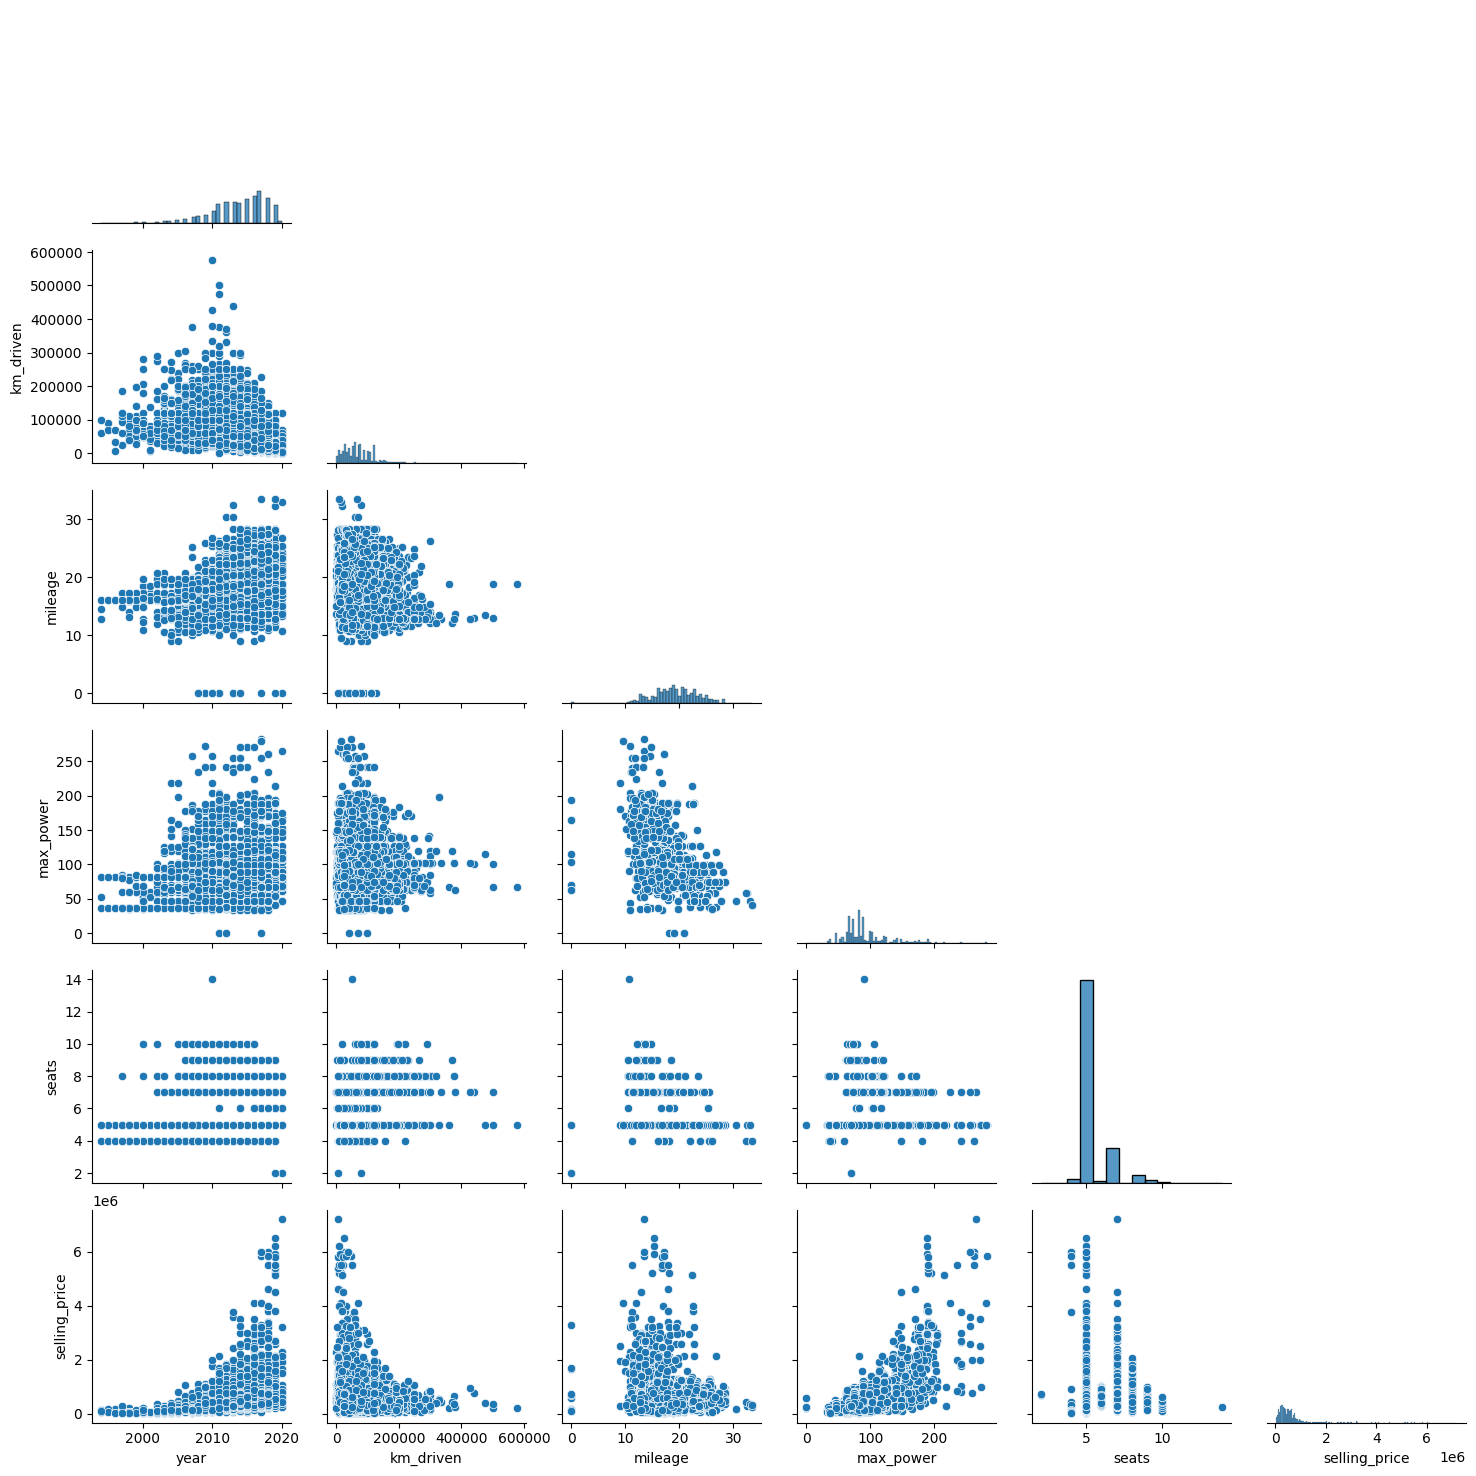

In [67]:
sns.pairplot(df, corner=True)

As we can see that we have a few X features which are not normally distributed. Therefore we will use the MinMaxScaler, when it is required to scale the data.

MinMaxScaler is used when our data does not follow a normal distribution. That is the case with our data set.

# Setting Up the Model(s)

## Splitting and Scaling the Data

In [68]:
# setting up the features
X=pd.get_dummies(df[['max_power', 'transmission', 'year', 'km_driven', 'fuel']], drop_first=True)
y=df['selling_price']

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

## Evaluation Method
As already stated, we have a few "outliers" in our data set. Because we want a more generalized model, nonetheless, we still want the most accurate model possible. Therefore we will use the root mean squared error as an evaluation metric, which penalizes errors much stronger than the mean absolute error.

## Dummy Regressor Model

In [69]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv=KFold(n_splits=10, shuffle=True, random_state=101)

dummy_reg=DummyRegressor().fit(X_train, y_train)

score=cross_val_score(dummy_reg,X,y,scoring='neg_root_mean_squared_error')
print('Best RMSE score: ', (score.min()*-1))

Best RMSE score:  871337.6903314582


That is the baseline of our project. All the following models will be compared against the baseline.

Note => That is a very bad model, and outperforming it is not supposed to be hard.

## Support Vector Regressor

In [72]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

svr=SVR()

param_grid={'kernel':['linear','poly','rbf','sigmoid'], 'degree':[1,2,3,4,5,6,7],
           'gamma':['scale', 'auto'], 'coef0':[0.0,0.001,0.01,0.1,0.2,0.5,0.7,1],
            'C':[0.01,0.1,0.2,0.5,0.75,1,2,4,6,8], 'epsilon':[0.001,0.01,0.1,0.5,1,2],
           'shrinking':[True,False]}

# here we set up the cross-validation method and iterations
cv=KFold(n_splits=10, shuffle=True, random_state=101)

rand_svr=RandomizedSearchCV(svr, param_distributions=param_grid, n_iter=100,
                           scoring='neg_root_mean_squared_error', cv=cv, random_state=101, return_train_score=True)

# when we get the error=> X should be a square kernel matrix=> remove 'precomputed'

In [ ]:
rand_svr.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=SVR(), n_iter=100,
                   param_distributions={'C': [0.01, 0.1, 0.2, 0.5, 0.75, 1, 2,
                                              4, 6, 8],
                                        'coef0': [0.0, 0.001, 0.01, 0.1, 0.2,
                                                  0.5, 0.7, 1],
                                        'degree': [1, 2, 3, 4, 5, 6, 7],
                                        'epsilon': [0.001, 0.01, 0.1, 0.5, 1,
                                                    2],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

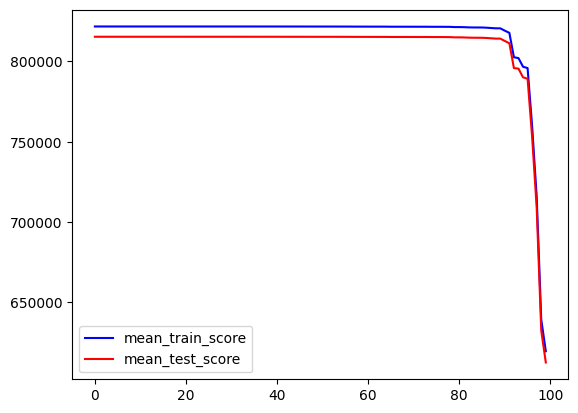

In [ ]:
rand_svr.cv_results_.keys()
rand_svr.cv_results_['mean_train_score']
rand_svr.cv_results_['mean_test_score']

plt.figure()
plt.plot(sorted(rand_svr.cv_results_['mean_train_score']*-1, reverse=True), color='blue')
plt.plot(sorted(rand_svr.cv_results_['mean_test_score']*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

The model is rather underfitting because we do not get much separation between the mean_train and mean_test score, but there is still a slight separation. The underfitting can be traced back to the small number of X features we use for the project.

In [ ]:
# the best hyperparamter of the SVM
print(rand_svr.best_params_)
# average performance of the model to unseen data
svr_rmse=(rand_svr.best_score_)*-1
print('Best RMSE of the SupportVectorRegressor: ', svr_rmse)

{'shrinking': False, 'kernel': 'poly', 'gamma': 'scale', 'epsilon': 0.5, 'degree': 6, 'coef0': 1, 'C': 8}
Best RMSE of the SupportVectorRegressor:  612629.399684739


The model performs better than the baseline but the basline model does not perform well.

Let's try our next model and check if this model performs better.

# RandomForest Regressor

In [ ]:
X.shape

(8122, 7)

In [73]:
from sklearn.ensemble import RandomForestRegressor

rand_reg=RandomForestRegressor(random_state=101)

param_grid={'n_estimators':[10,50,100,150,175,200,250,300,500],
            'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
           'min_samples_split':[2,4,6,8,10,20,50,100], 'min_samples_leaf':[1,2,5,10,15,20,25,30,35,40],
           'max_features':['sqrt', 'log2', 'None'], 'bootstrap':[True, False]}

rand_forreg=RandomizedSearchCV(rand_reg, param_distributions=param_grid, n_iter=100,
                               scoring='neg_root_mean_squared_error',
                               cv=cv, random_state=101, return_train_score=True)

In [ ]:
rand_forreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
340 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
340 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=RandomForestRegressor(random_state=101),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_features': ['sqrt', 'log2',
                                                         'None'],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20, 25, 30, 35,
                                                             40],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              20, 50, 100],
                                        'n_estimators': [10, 50, 100, 150, 175,
                                                         200, 250, 300, 500]},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

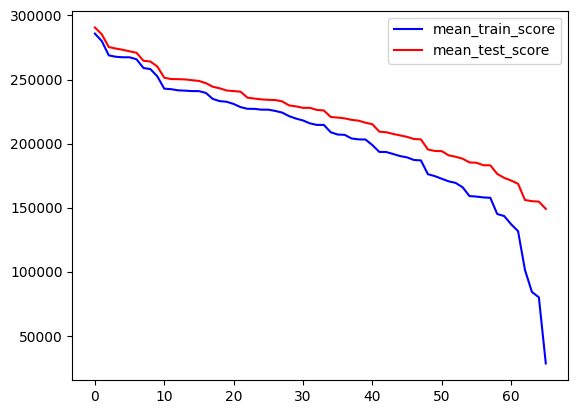

In [ ]:
rand_forreg.cv_results_.keys()

train=np.array(rand_forreg.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(rand_forreg.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

The model is most currently overfitting. the train score is decreasing too drastically.

In [ ]:
# best hyperparameters for the RandomForestRegressor model
print(rand_forreg.best_params_)
# average performance to unseen data
rf_rmse=np.sqrt((rand_forreg.best_score_)*-1)
print('Best RMSE of the RandomForestRegressor: ', rf_rmse)

{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'squared_error', 'bootstrap': False}
Best RMSE of the RandomForestRegressor:  386.2151842307762


Here we can see that the RandomForest model is performing the best, but this model had the longest running time. Let's create the GradientBoostingRegressor model and check its performance based on our data set.

# GradientBoostingRegressor

We will use the Gradient Boosting Regressor instead of the Hist Gradient Boosting Regressor because our data set is smaller than 10.000 data rows.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg=GradientBoostingRegressor(random_state=101)

param_grid={'loss':["squared_error", "absolute_error", "huber", "quantile"],
            'learning_rate':[0.001,0.01,0.1,0.2,0.5,0.75,0.9,0.99,1], 'n_estimators':[50,100,150,200,250,300],
           'criterion':['friedman_mse', 'squared_error'], 'min_samples_split':[2,4,8,12,20,30],
           'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10], 'max_depth':[2,4,6,8,10,12],
            'max_features':['auto','sqrt','log2'],'alpha':[0.1,0.5,0.75,0.9,0.99], 'max_leaf_nodes':[2,4,6,8,10],
           'n_iter_no_change':[1,3,6,8], 'tol':[0.01,0.1,0.5,0.75,1]}

gbr_grid=RandomizedSearchCV(gbr_reg, param_distributions=param_grid, n_iter=100,
                            scoring='neg_root_mean_squared_error', cv=cv,random_state=101, return_train_score=True)

In [ ]:
# this model perfomred the hyperparameter tuning so much faster than RandomForestRegressor
gbr_grid.fit(X_train, y_train)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=GradientBoostingRegressor(random_state=101),
                   n_iter=100,
                   param_distributions={'alpha': [0.1, 0.5, 0.75, 0.9, 0.99],
                                        'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.5, 0.75, 0.9, 0.99,
                                                          1],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 4, 8, 12, 20,
                                                              30],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300],
                                        'n_iter_no_change': [1, 3, 6, 8],
                                        'tol': [0.01, 0.1, 0.5, 0.75, 1]},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

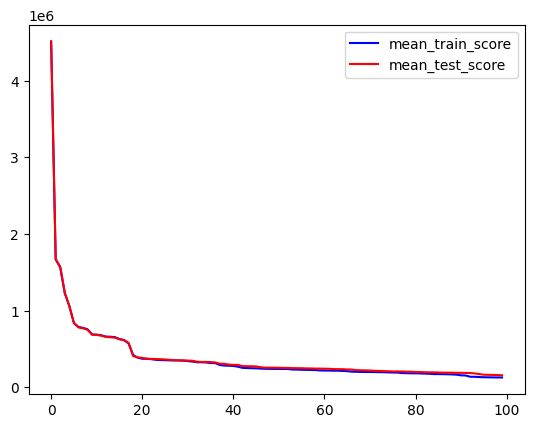

In [ ]:
# here we get the outcome of our validation/cross-validation and test set
gbr_grid.cv_results_.keys()

train=np.array(gbr_grid.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(gbr_grid.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

The Gradient Boosting model is underfitting. There is almost no separation between the two scores.

In [ ]:
# best hyperparameters for the GradientBoostRegressor
print(gbr_grid.best_params_)
# average performance to unseen data
gbr_rmse=(gbr_grid.best_score_)*-1
print('Best RMSE of the GradientBoostRegressor: ', gbr_rmse)

{'tol': 0.1, 'n_iter_no_change': 6, 'n_estimators': 300, 'min_samples_split': 30, 'min_samples_leaf': 4, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 8, 'loss': 'squared_error', 'learning_rate': 0.1, 'criterion': 'friedman_mse', 'alpha': 0.99}
Best RMSE of the GradientBoostRegressor:  158930.9965599138


The performance is not bad, but the RandomForest model is still the best-performing model.

We still have two more models to go:

- Ada Boost Regressor

- XG Boost Regressor

# AdaBoostRegressor

In [74]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_reg=AdaBoostRegressor(random_state=101)

aram_grid={'estimator':[DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=2)
                        , DecisionTreeRegressor(max_depth=6), DecisionTreeRegressor(max_depth=10),
                       DecisionTreeRegressor(max_depth=15), DecisionTreeRegressor(max_depth=20),
                       DecisionTreeRegressor(max_depth=30), DecisionTreeRegressor(max_depth=40)]
           ,'n_estimators':[50,100,150,200,250],
           'learning_rate':[0.001,0.01,0.1,0.2,0.5,0.75,0.9,0.99,1], 'loss':['linear','square', 'exponential']}

ada_grid=RandomizedSearchCV(ada_reg, param_distributions=aram_grid, n_iter=100,
                            scoring='neg_root_mean_squared_error', cv=cv,
                            error_score='raise', random_state=101, return_train_score=True)

In [ ]:
ada_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise',
                   estimator=AdaBoostRegressor(random_state=101), n_iter=100,
                   param_distributions={'estimator': [DecisionTreeRegressor(max_depth=1),
                                                      DecisionTreeRegressor(max_depth=2),
                                                      DecisionTreeRegressor(max_depth=6),
                                                      DecisionTreeRegressor(max_depth=10),
                                                      DecisionTreeRegressor(max_depth=15),
                                                      DecisionTreeRegressor(max_depth=20),
                                                      DecisionTreeRegressor(max_depth=30),
                                                      DecisionTreeRegressor(max_depth=40)],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0.5, 0.75, 0.9, 0.99,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

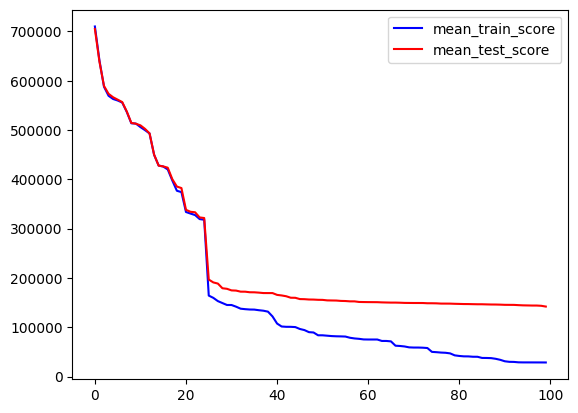

In [ ]:
ada_grid.cv_results_.keys()

train=np.array(ada_grid.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(ada_grid.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

Here we do have seperation between the mean_train and mean_test score. This model is not over- nor underfitting.

In [ ]:
# best hyperparameters for the AdaBoostRegressor
print(ada_grid.best_params_)
# average performance to unseen data
ada_rmse=(ada_grid.best_score_)*-1
print('Best RMSE of the AdaBoostRegressor: ', ada_rmse)

{'n_estimators': 250, 'loss': 'square', 'learning_rate': 0.01, 'estimator': DecisionTreeRegressor(max_depth=10)}
Best RMSE of the AdaBoostRegressor:  142078.27966839113


Our AdaBoostRegressor performs as well us our GradientBoostRegressor, but based on the cross-validation, our AdaBoost model performs better.

The final model will be the XGBoostRegressor model.

## XGBoostRegressor

In [75]:
# !pip install xgboost
# Note for AdaBoost and XGBoost, we need to test different DecisionTreeRegressor(max_depth=)
import xgboost as xgb

param_xgb={'max_depth':[1,3,4,6,8,12,20,30,40],'learning_rate':[0,0.001,0.01,0.1,0.2,0.5,0.75,0.9,0.99,1],
          'n_estimators':[50,100,200,250,300,350], 'colsample_bytree':[0,1,2,4,6,8,10],
           'subsample':np.linspace(0,1,10), 'alpha':[0,00.1,0.01,0.1,0.5,1,2,3],
           'lambda':[0,00.1,0.01,0.1,0.5,1,2,3], 'gamma':[0,00.1,0.01,0.1,0.5,1,2,3],
          'estimator':[DecisionTreeRegressor(max_depth=1),DecisionTreeRegressor(max_depth=2)
                        , DecisionTreeRegressor(max_depth=6), DecisionTreeRegressor(max_depth=10),
                       DecisionTreeRegressor(max_depth=15), DecisionTreeRegressor(max_depth=20),
                       DecisionTreeRegressor(max_depth=30), DecisionTreeRegressor(max_depth=40)]}

xgb_reg=xgb.XGBRegressor(random_state=101)

xgb_grid=RandomizedSearchCV(xgb_reg, param_distributions=param_xgb, n_iter=100,
                            scoring='neg_root_mean_squared_error', cv=cv,
                            random_state=101, return_train_score=True)

In [ ]:
xgb_grid.fit(X_train, y_train)

[09:32:27] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:32:33] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:32:38] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:32:44] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:32:48] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:32:53] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:32:59] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:33:03] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:33:09] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:33:14] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:33:20] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.

[09:33:20] WARNING: ../src/learner.cc:767: 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
740 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_

[09:39:31] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.



RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=N...
                                        'lambda': [0, 0.1, 0.01, 0.1, 0.5, 1, 2,
                                                   3],
                                        'learning_rate': [0, 0.001, 0.01, 0.1,
                                                          0.2, 0.5, 0.75, 0.9,
                                                          0.99, 1],
                                        'max_depth': [1, 3, 4, 6, 8, 12, 20, 30,
                                                      40],
                                        'n_estimators': [50, 100, 200, 250, 300,
                                                         350],
                                        'subsample': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
                   random_state=101, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

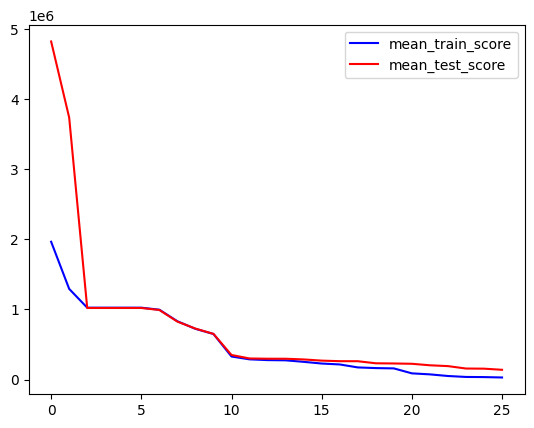

In [ ]:
xgb_grid.cv_results_.keys()

train=np.array(xgb_grid.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(xgb_grid.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

Here we could argue again that the model is rather underfitting. This can be traced back to the limited amount of X features. Overall, the model looks good and is still within the boundaries of a decent model.

In [ ]:
# best hyperparameter for the XGBoostRegressor
print(xgb_grid.best_params_)
# average performance to unseen data
xgb_rmse=(xgb_grid.best_score_)*-1
print('Best RMSE of the GradientBoostRegressor: ', xgb_rmse)

{'subsample': 0.7777777777777777, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'lambda': 0, 'gamma': 0.5, 'estimator': DecisionTreeRegressor(max_depth=2), 'colsample_bytree': 1, 'alpha': 0.01}
Best RMSE of the GradientBoostRegressor:  138463.14009833388


Let's evaluate the models, to see which one of them performed the best.

## Neural Network

As we can see, all our ML models could not predict a "good" outcome. It is important to mention every case/situation has a different understanding of being sufficient/good, but in our case, the models did not live up to our expectations. Therefore we choose a different approach. We will move to deep learning. To be more specific, we will build a neural network.

When building a neural network, we need to scale our data (MinMaxScaler) so that our data is between the range 0 to 1. Due to our data's not/unnormal distribution, we have chosen the MinMaxScaler already and scaled the data.

To find the best model possible, we will use Keras_Tuner to tune our hyperparameter.

Next, we need to import the required libraries.

In [ ]:
# !pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras import metrics

In [ ]:
# kernel_initializer=> for classification tasks/problems
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', mode='min', patience=10)

nw_model=Sequential()
nw_model.add(Dense(14, activation='relu', input_shape=(7,)))
nw_model.add(Dropout(0.25))
nw_model.add(Dense(7, activation='relu'))
nw_model.add(Dropout(0.25))
nw_model.add(Dense(1, activation='relu'))
nw_model.compile(loss='mse', optimizer='adam')

In [ ]:
nw_model.fit(scaled_X_train, y_train, epochs=1000, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
191/191 [==============================] - 2s 4ms/step - loss: 1047322230784.0000 - val_loss: 1041002594304.0000
Epoch 2/1000
191/191 [==============================] - 1s 3ms/step - loss: 1047301324800.0000 - val_loss: 1040956653568.0000
Epoch 3/1000
191/191 [==============================] - 1s 3ms/step - loss: 1047213441024.0000 - val_loss: 1040816472064.0000
Epoch 4/1000
191/191 [==============================] - 1s 3ms/step - loss: 1047000711168.0000 - val_loss: 1040525099008.0000
Epoch 5/1000
191/191 [==============================] - 1s 3ms/step - loss: 1046607953920.0000 - val_loss: 1040047472640.0000
Epoch 6/1000
191/191 [==============================] - 1s 3ms/step - loss: 1046037987328.0000 - val_loss: 1039376842752.0000
Epoch 7/1000
191/191 [==============================] - 1s 3ms/step - loss: 1045260337152.0000 - val_loss: 1038488764416.0000
Epoch 8/1000
191/191 [==============================] - 1s 3ms/step - loss: 1044288372736.0000 - val_loss: 10373437849

In [ ]:
# getting the rmse output
model_loss=pd.DataFrame(nw_model.history.history)
model_loss['loss']=np.sqrt(model_loss['loss'])
model_loss['val_loss']=np.sqrt(model_loss['val_loss'])
model_loss

,loss,val_loss
0,1.023388e+06,1.020295e+06
1,1.023377e+06,1.020273e+06
2,1.023334e+06,1.020204e+06
3,1.023231e+06,1.020061e+06
4,1.023039e+06,1.019827e+06
...,...,...
995,5.083578e+05,3.996250e+05
996,5.033789e+05,3.995129e+05
997,5.148856e+05,3.993764e+05
998,5.139285e+05,3.991444e+05


<Axes: >

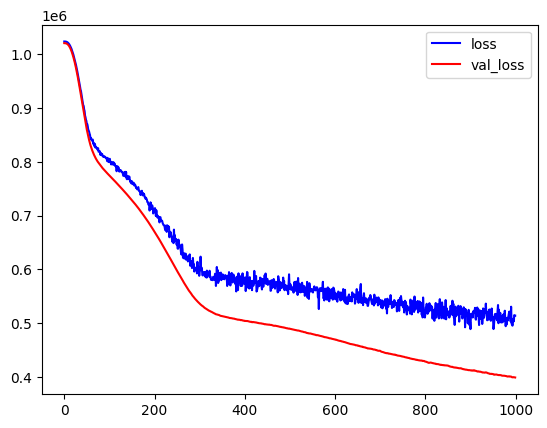

In [ ]:
model_loss.plot(color=['blue','red'])

In [ ]:
ann_rmse=model_loss['val_loss'].min()
ann_rmse

399005.62738888786

The model does not perform well, and the model is underfitting. Let's try to improve the model by tuning the hyperparameters.

In [ ]:
#!pip install keras-tuner
import tensorflow as tf
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, Hyperband

# next, we need to set up the def function for our neural network
def reg_model_builder(x):
    nw_model=Sequential()
    #hp_units_input=x.Int('units', min_value=7, max_value=10)
    hp_units_hidden=x.Int('units', min_value=2, max_value=10)
    hp_act=x.Choice('activation', ['relu','sigmoid','softmax','tanh','linear'])
    nw_model.add(Dense(10, activation=hp_act, input_shape=(7,)))
    hp_drop=x.Choice('dropout', values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    nw_model.add(Dropout(hp_drop))
    nw_model.add(Dense(hp_units_hidden, activation=hp_act))
    nw_model.add(Dropout(hp_drop))
    nw_model.add(Dense(1, activation=hp_act))
    hp_learn=x.Choice('learning_rate', values=[0.0001,0.001,0.01,0.1])
    nw_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learn))
    return nw_model

In [ ]:
tuner=kt.RandomSearch(reg_model_builder, objective='val_mse',max_retries_per_trial=5, seed=101,
                      max_consecutive_failed_trials=10,max_trials=7,directory='dict',project_name='car')

In [ ]:
tuner.search(X_train, y_train, epochs=1000, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Trial 7 Complete [00h 00m 10s]

Best val_mse So Far: None
Total elapsed time: 00h 31m 26s


In [ ]:
best=tuner.get_best_hyperparameters(1)[0]
print(best.values)

{'units': 7, 'activation': 'relu', 'dropout': 0.9, 'learning_rate': 0.1}


In [ ]:
n_best_models=tuner.get_best_models()
print(n_best_models[0].summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
tuner_nw_model=Sequential()
tuner_nw_model.add(Dense(10, activation='relu', input_shape=(7,)))
tuner_nw_model.add(Dropout(0.9))
tuner_nw_model.add(Dense(7, activation='relu'))
tuner_nw_model.add(Dropout(0.9))
tuner_nw_model.add(Dense(1, activation='relu'))
tuner_nw_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

In [ ]:
tuner_nw_model.fit(scaled_X_train, y_train, epochs=1000, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])

Epoch 1/1000
191/191 [==============================] - 8s 16ms/step - loss: 1033852682240.0000 - val_loss: 990084464640.0000
Epoch 2/1000
191/191 [==============================] - 4s 22ms/step - loss: 1015294001152.0000 - val_loss: 971211866112.0000
Epoch 3/1000
191/191 [==============================] - 2s 10ms/step - loss: 1005808123904.0000 - val_loss: 960501448704.0000
Epoch 4/1000
191/191 [==============================] - 2s 9ms/step - loss: 1002296508416.0000 - val_loss: 955589984256.0000
Epoch 5/1000
191/191 [==============================] - 1s 7ms/step - loss: 997882527744.0000 - val_loss: 945906188288.0000
Epoch 6/1000
191/191 [==============================] - 2s 11ms/step - loss: 994038054912.0000 - val_loss: 941438795776.0000
Epoch 7/1000
191/191 [==============================] - 2s 9ms/step - loss: 984378245120.0000 - val_loss: 933680775168.0000
Epoch 8/1000
191/191 [==============================] - 3s 13ms/step - loss: 984681283584.0000 - val_loss: 917147222016.0000

In [ ]:
tuned_model_loss=pd.DataFrame(tuner_nw_model.history.history)
tuned_model_loss['loss']=np.sqrt(tuned_model_loss['loss'])
tuned_model_loss['val_loss']=np.sqrt(tuned_model_loss['val_loss'])
tuned_model_loss

,loss,val_loss
0,1.016785e+06,995029.881280
1,1.007618e+06,985500.819945
2,1.002900e+06,980051.758176
3,1.001148e+06,977542.829883
4,9.989407e+05,972577.086039
...,...,...
62,9.356325e+05,861470.658593
63,9.415322e+05,865039.682604
64,9.308595e+05,862307.034692
65,9.258133e+05,857531.947151


<Axes: >

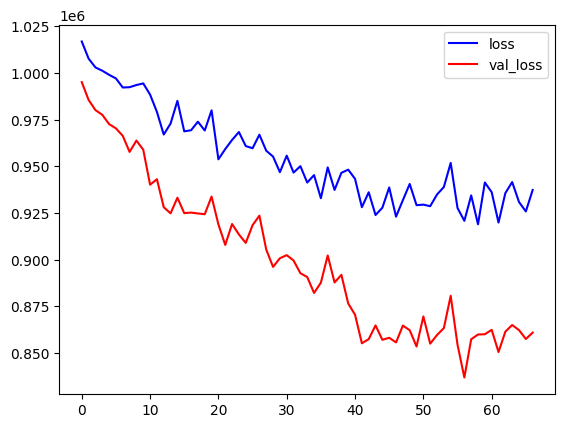

In [ ]:
tuned_model_loss.plot(color=['blue', 'red'])

Even after tuning our neural network, the model is still underfitting. The main reason seems to be the few X features that we are using. In future projects, we should use more X features.

In [ ]:
tuned_ann_rmse=tuned_model_loss['val_loss'].min()
tuned_ann_rmse

836946.2229414743

# Comparing the Models

In [ ]:
result={'SVR':svr_rmse, 'RandomForest':rf_rmse, 'AdaBoost':ada_rmse,
        'GradientBoost':gbr_rmse, 'XGBoost':xgb_rmse, 'ANN':ann_rmse, 'tuned_ANN':tuned_ann_rmse}
results=pd.DataFrame.from_dict(result, orient='index').rename(columns={0:'RMSE'})
results

,RMSE
SVR,612629.399685
RandomForest,386.215184
AdaBoost,142078.279668
GradientBoost,158930.996560
XGBoost,138463.140098
ANN,399005.627389
tuned_ANN,836946.222941


In [ ]:
results[results['RMSE']==results['RMSE'].min()]

,RMSE
RandomForest,386.215184


The RandomForest model has the best remse-score, but as we remeber the model is overfitting, therefore we take the sceond smallest rmse, which comes from the XGBoost model.

# Model Deployment

In [80]:
final_model=xgb.XGBRegressor(subsample=0.7777777777777777, n_estimators=300, max_depth=4, learning_rate=0.1, reg_lambda=0, gamma=0.5, estimator=DecisionTreeRegressor(max_depth=2),
                         colsample_bytree=1, alpha=0.01)

In [81]:
# the final performance of the model
final_model.fit(X_train,y_train)

y_pred=final_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

[14:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "estimator" } are not used.



139677.52140519524

In [82]:
import joblib
joblib.dump(final_model, 'predicting car price.pkl')

['predicting car price.pkl']

In [83]:
X.columns.to_list()

['max_power',
 'year',
 'km_driven',
 'transmission_Manual',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol']

In [84]:
X.iloc[1,:]

max_power                 103.52
year                     2014.00
km_driven              120000.00
transmission_Manual         1.00
fuel_Diesel                 1.00
fuel_LPG                    0.00
fuel_Petrol                 0.00
Name: 1, dtype: float64

In [85]:
inputs=(103.52,2014.0,120000.0,1.0,1.0,0.0,0.0)

input_data_as_numpy_array=np.asarray(inputs)

input_reshape=input_data_as_numpy_array.reshape(1,-1)

final_model.predict(input_reshape)

array([516242.97], dtype=float32)

In [86]:
y.iloc[1]

370000

In [87]:
def car_predict(max_power,year,km_driven,transmission_Manual,fuel_Diesel,fuel_LPG,fuel_Petrol):
  inputs=(max_power,year,km_driven,transmission_Manual,fuel_Diesel,fuel_LPG,fuel_Petrol)

  input_data_as_numpy_array=np.asarray(inputs)

  input_reshape=input_data_as_numpy_array.reshape(1,-1)

  output=final_model.predict(input_reshape)

  return(output)

In [88]:
X_test.iloc[11]

max_power                 81.83
year                    2018.00
km_driven              15000.00
transmission_Manual        1.00
fuel_Diesel                0.00
fuel_LPG                   0.00
fuel_Petrol                1.00
Name: 7030, dtype: float64

In [89]:
print('The model´s prediction: ',car_predict(81.83,2018.0,15000.0,1.0,0.0,0.0,1.0))
print('Actual outcome/price: ', y_test.iloc[11])

The model´s prediction:  [647583.5]
Actual outcome/price:  650000


# Conclusion

The XGBoostRegressor was/is the best fit for the chosen data set. The XGBoostRegressor gave us the smallest RMSE (Root Mean Squared Error), ignoring the RandomForest model because it is overfitting.

As stated, we were generous/less strict throughout the project regarding defining an outlier. This approach could be why we still have a relatively high MAE. In future projects, we can be more strict with outliers and see how that will affect the model selection and performance.

Another aspect that could be changed in future projects is that we can use different X features.

It is also important to mention we have used a neural network to see if we can increase the accuracy (reducing root means squared error). Our model did not accomplish that. As already stated, our ANN was underfitting, which means our model could not find the unique aspects of our data throughout the training. This can be because we only used seven features of potential 13. Neural networks can handle more features, which allows them to perform better. In our case, we only used seven features, which could lead to poor performance (high rise and underfitting).

For future studies, we can use all features in a neural network and check if the neural network's performance beats the XGBoostRegressor's performance.